In [2]:
import pandas as pd
#from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot


In [3]:
data = pd.read_csv('/Users/Apple/Desktop/DataX/Deep Vu project/resupplychainoptimizationdataxprojectteam/metals_daily_train.csv')

In [4]:
data.head()

,date,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
0,20080701,NaN,NaN,NaN,24.72,24.85,23.77,23.80,24.66,24.72,...,16175.0,16240.0,16055.0,16165.0,16185.0,16250.0,16080.0,16145.0,2008,20080630
1,20080702,NaN,NaN,NaN,23.80,24.99,23.67,24.95,23.72,24.80,...,16130.0,16170.0,15910.0,16045.0,16125.0,16180.0,15880.0,16020.0,2008,20080630
2,20080703,NaN,NaN,NaN,24.80,25.25,24.49,24.69,24.65,25.06,...,15825.0,15960.0,15470.0,15650.0,15900.0,15950.0,15385.0,15640.0,2008,20080630
3,20080704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15060.0,15260.0,15060.0,15175.0,15055.0,15250.0,15055.0,15155.0,2008,20080630
4,20080707,NaN,NaN,NaN,24.30,25.30,24.19,24.78,24.33,25.10,...,15100.0,15255.0,15100.0,15190.0,15010.0,15240.0,15010.0,15165.0,2009,20080707


In [5]:
# remove remove rows where NaN values for the moment

data2 = data.dropna()
data2.head()


,date,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
109,20081201,444.511058,457.032497,457.032497,53.08,56.33,52.62,56.29,49.11,52.15,...,9420.0,9680.0,9315.0,9540.0,9520.0,9800.0,9495.0,9650.0,2030,20081201
110,20081202,446.908899,465.530103,459.323035,55.99,56.29,54.68,55.30,51.80,52.24,...,9480.0,9600.0,9430.0,9510.0,9640.0,9730.0,9560.0,9630.0,2030,20081201
111,20081203,453.484820,482.060575,459.696940,56.50,56.72,54.65,55.21,53.01,53.02,...,9495.0,9580.0,9400.0,9500.0,9530.0,9690.0,9505.0,9590.0,2030,20081201
112,20081204,447.532919,472.395859,459.964389,55.50,57.81,54.88,57.62,51.75,54.42,...,9485.0,9485.0,9120.0,9145.0,9400.0,9445.0,9205.0,9225.0,2030,20081201
113,20081205,447.084228,471.922241,459.503235,58.50,60.00,56.63,56.75,54.70,56.18,...,8710.0,9000.0,8595.0,8665.0,8885.0,8940.0,8670.0,8715.0,2030,20081201


date
2008-12-01    457.032497
2008-12-02    465.530103
2008-12-03    482.060575
2008-12-04    472.395859
2008-12-05    471.922241
Name: p1, dtype: float64


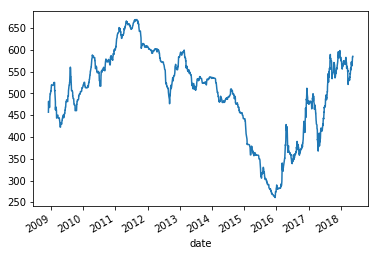

In [6]:
date = data2.date
index = pd.to_datetime(date, format='%Y%m%d')

series = data2.set_index(index).p1
print(series.head())
series.plot()
pyplot.show()

In [7]:
from pandas.tools.plotting import autocorrelation_plot

/Users/Apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


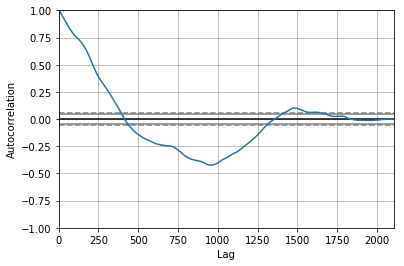

In [8]:
# autocorrelation plot
autocorrelation_plot(series)
pyplot.show()

In [9]:
# as seen in Autocorrelation plot below, the values are highly positively correlated
# the correlation is significant for the first 2000 lags 
# we can start using a model with a lag approximately 350 time periods

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

## Trial with first 200 sample points

In [11]:
#fit model
series = data2.set_index(index).p1[0:200]
model = ARIMA(series, order=(25,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())  # print summary


/Users/Apple/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Apple/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D.p1   No. Observations:                  199
Model:                ARIMA(25, 1, 0)   Log Likelihood                -605.111
Method:                       css-mle   S.D. of innovations              5.050
Date:                Sun, 21 Oct 2018   AIC                           1264.221
Time:                        14:55:59   BIC                           1353.141
Sample:                             1   HQIC                          1300.209
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2043      0.643      0.318      0.751      -1.057       1.465
ar.L1.D.p1      0.0676      0.071      0.953      0.342      -0.071       0.207
ar.L2.D.p1      0.1660      0.073      2.275    

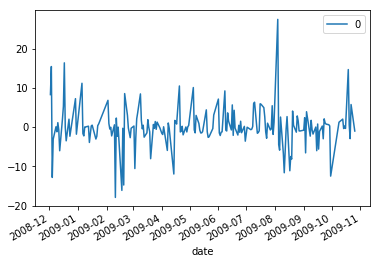

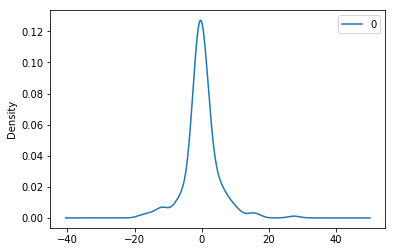

                0
count  199.000000
mean    -0.024535
std      5.091938
min    -17.871788
25%     -1.584794
50%     -0.247969
75%      1.475356
max     27.421884


In [13]:
#plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot() # line plot of residuals vs time
pyplot.show()
residuals.plot(kind='kde') # density plot of residuals
pyplot.show()
print(residuals.describe()) # print useful stats 

## Trial with Full sample

In [ ]:
#fit model
series = data2.set_index(index).p1
model = ARIMA(series, order=(100,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())  # print summary

## Trial with Training Set/Test Set

In [ ]:
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(350,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()